 In this notebook you will need to fill in some missing code to answer the questions below.
You will need to scroll down towards the bottom of this notebook to see the instructions.

Remember, with later versions of keras you must access it via 'tensorflow.keras' and not only 'keras', e.g., `from tensorflow.keras.layers import Dense`

In [5]:
from numpy.random import seed
seed(0)
from tensorflow.random import set_seed
set_seed(0)
import tensorflow as tf
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
import matplotlib.pyplot as plt


In [9]:
def load_data():
    from tensorflow.keras.datasets import cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    return (x_train, y_train), (x_test, y_test)

In [21]:
def display_image(data, index):
    im = data[index]
    plt.imshow(im)

In [22]:
def onehotencode(y_train, y_test):
    from tensorflow.keras.utils import to_categorical
    
    # One-hot encode y data
    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    return y_train_categorical, y_test_categorical

In [55]:
def build_fit_eval_model(x_train, x_test, y_train_categorical, y_test_categorical):
    # Import dependancies
    from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.optimizers import SGD
    
    height = x_train.shape[1]
    width = x_train.shape[2]
    channels = 3
    num_classes = y_train_categorical.shape[1]
    
    # Reshape data 
    x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
    x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)
    
    # Build model here.
    model = Sequential()
    
    model.add(Conv2D(filters=32, 
                kernel_size=(5,5), 
                padding='same', 
                activation='relu',
                input_shape=(height, width, channels)))
    model.add(MaxPooling2D(pool_size=(2,2),
                      strides=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model here
    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate=0.0001),
                  metrics=['accuracy'])

    # Fit model here
    history = model.fit(x_train_cnn, y_train_categorical, epochs=10)

    # Evaluate model on test set here
    loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)
    
    return model

In [57]:
def make_predictions(model, data, indices):
    display_image(x_test, indices[0])
    display_image(x_test, indices[1])

    predictions = model.predict(data[indices])
    print(predictions)

# STEP ZERO
You may want to consult the [notebook provided for week 4 on deep learning](https://colab.research.google.com/drive/176yS-mw-fO0JI1CAN97wgmyRx0N9xriI?usp=sharing). It has everything you need to complete the steps below.

# STEP ONE

You need to fill in the code for the load_data function above. Scroll up to the load_data function and import and load the CIFAR10 dataset from Keras (https://keras.io/api/datasets/cifar10/). CIFAR10 is a dataset of 70,000 labeled images, each belonging to one of ten classes.

In [47]:
(x_train, y_train), (x_test, y_test) = load_data()

# STEP TWO
You need to fill in the code for the display_image function above. In this function you should write two lines of code. The first will select the datapoint at the supplied index of the supplied dataset. The second line should plot it.

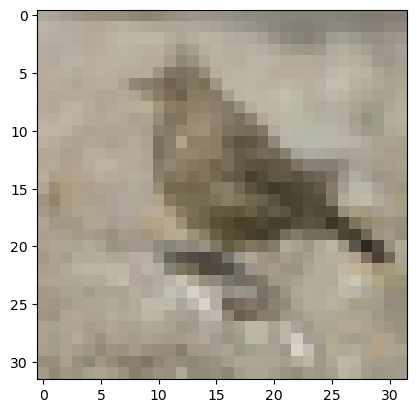

In [20]:
display_image(x_train, 120) 

# STEP THREE
You need to fill in the code for the onehotenencode function above. The function should one hot encode the training and test labels, and return them.

In [48]:
y_train_categorical, y_test_categorical = onehotencode(y_train, y_test)

# STEP FIVE
Now the data is loaded and prepared, the next task is to design a CNN with a single convolutional layer, a single max pooling layer, and two dense layers. 

* The convolutional layer should have 32 filters, padding should be the 'same' and the kernel size should be 5x5. 
* The max pooling layer should have a pool size of 2x2 and stride size of 2x2. 
The dense layers should have 32 and num_classes neurons (units), respectively. 
 * All activation functions should be relu, except for the final layer which should be softmax. 
* The optimizer should be SGD with a learning rate of 0.001.
* Train the network for 10 epochs.


Train this network (model.fit()) and evaluate it on the test set (model.evaluate()).

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?

In [ ]:
model = build_fit_eval_model(x_train, x_test, y_train_categorical, y_test_categorical)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.6615 - accuracy: 0.0998
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3044 - accuracy: 0.1012
Epoch 3/10
1352/1563 [========================>.....] - ETA: 4s - loss: 2.2963 - accuracy: 0.1107

# STEP SIX
Let's modify the CNN to improve performance.

Add another another convolutional blocks (Conv2D + Max Pooling) after the first, with the same hyperparameters as the first, but double the number of filters.

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?


# STEP SEVEN

Let's modify the CNN further to improve performance.

Add another Dense layer, before the first Dense layer in the network. Give it 64 neurons with relu activation.

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?


# STEP EIGHT

Let's try something else. There are many different ways of modifying the network further. For example, we could change the optimizer. SGD is one way of optimizing our neural network, however, more complex optimizers are available. While the theory of them are outside the scope of this unit (deep learning could be unit on its own), they are worth knowing about if you are doing deep learning. Perhaps the most widely used optimizer in deep neural networks is the Adam optimizer, which is an extension of SGD. Thankfully, to use them is easy. Update the optimizer in in the model compile function to use the Adam optimiser with a learning rate of 0.001.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam



Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset? Report the percentage.

# STEP NINE

I have provided a function called 'make_predictions'. Use this function, supplying indexes 333 and 1375 of the test set. Ensure that two images are produced alongside their labels.

The labels map to the class names as follows:
* 0 is airplane
* 1 is automobile
* 2 is bird
* 3 is cat 
* 4 is deer
* 5 is dog
* 6 is frog
* 7 is horse
* 8 is ship
* 9 is truck

In [ ]:
make_predictions(model, data, indices)